In [ ]:
#Importing all the required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Load the data
Tweets = pd.read_csv('Corona_NLP_test.csv')
print(Tweets)


In [115]:
# Tokenization and Preprocessing
stop_words = set(stopwords.words('english'))

clean_tweets = []
for tweet in Tweets['OriginalTweet']:
    # Removing URLs,mentions, hashtags and  punctuations
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Tokenize
    tokens = nltk.word_tokenize(tweet)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # Join tokens back into a string
    clean_tweet = ' '.join(filtered_tokens)
    # Append clean tweet to the list
    clean_tweets.append(clean_tweet)

# Add clean tweets to the dataframe
Tweets['clean_text'] = clean_tweets
print(clean_tweets)

# Saving the cleaned dataset file
Tweets.to_csv('cleaned_tweets.csv', index=False)


['TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans Brooklyn soldout online grocers FoodKick MaxDelivery fearing shoppers stock', 'couldnt find hand sanitizer Fred Meyer turned 11497 2 pack PurellCheck concerns driving prices', 'Find protect loved ones', 'buying hits City anxious shoppers stock foodampmedical supplies worker 30s becomes 1st confirmed patient staged event', 'One week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid 299 gallon regular gas Los AngelesPrices pump going look impacting prices 4pm', 'Voting age hand sanitizer', 'cant stop without protecting Prices surgical masks increased sixfold N95 respirators trebled amp gowns cost twice much', 'HI TWITTER pharmacist sell hand sanitizer living exists Like masks sold fuck everywhere WORRIED Use soap VISIT TWENTY PHARMACIES LOOKING LAST BOTTLE Pharmacies full sick people', 'Anyone supermarket last days Went NORMAL shop last night amp sight greeted Barmy Btw

In [116]:
# Removing the stop words
tokens = []
for tweet in Tweets['clean_text']:
    words = nltk.word_tokenize(tweet)
    tokens.extend(words)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if not word.lower() in stop_words]
print(filtered_tokens)

['TRENDING', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'Wegmans', 'Brooklyn', 'soldout', 'online', 'grocers', 'FoodKick', 'MaxDelivery', 'fearing', 'shoppers', 'stock', 'couldnt', 'find', 'hand', 'sanitizer', 'Fred', 'Meyer', 'turned', '11497', '2', 'pack', 'PurellCheck', 'concerns', 'driving', 'prices', 'Find', 'protect', 'loved', 'ones', 'buying', 'hits', 'City', 'anxious', 'shoppers', 'stock', 'foodampmedical', 'supplies', 'worker', '30s', 'becomes', '1st', 'confirmed', 'patient', 'staged', 'event', 'One', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', '299', 'gallon', 'regular', 'gas', 'Los', 'AngelesPrices', 'pump', 'going', 'look', 'impacting', 'prices', '4pm', 'Voting', 'age', 'hand', 'sanitizer', 'cant', 'stop', 'without', 'protecting', 'Prices', 'surgical', 'masks', 'increased', 'sixfold', 'N95', 'respirators', 'trebled', 'amp', 'gowns', 'cost', 'tw

In [117]:
# Count word frequencies
from collections import Counter
word_freq = Counter(filtered_tokens)
print(word_freq)


Counter({'food': 1177, 'store': 966, 'grocery': 754, 'stock': 678, 'people': 671, 'amp': 577, 'shopping': 475, 'supermarket': 446, 'online': 439, 'panic': 411, 'prices': 401, 'COVID19': 387, 'need': 348, 'paper': 335, 'toilet': 329, 'like': 312, 'get': 301, 'buying': 275, '19': 274, 'going': 242, 'go': 242, 'local': 237, 'dont': 234, 'Im': 224, 'time': 215, 'home': 212, 'shelves': 201, 'work': 194, 'buy': 188, 'stores': 184, 'due': 175, 'help': 171, 'today': 171, 'supplies': 159, 'us': 159, 'everyone': 152, 'retail': 150, 'demand': 148, '2': 146, 'consumer': 135, 'cant': 132, 'one': 130, 'would': 125, 'hand': 124, 'know': 122, 'empty': 121, 'virus': 121, 'still': 118, 'even': 118, 'Please': 117, 'items': 116, 'please': 114, 'think': 113, 'water': 113, 'many': 112, 'take': 111, 'see': 110, 'make': 109, 'stay': 107, 'Food': 106, 'day': 104, 'weeks': 104, 'coronavirus': 102, 'leave': 102, 'keep': 101, 'pandemic': 99, 'good': 97, 'right': 95, 'People': 94, '1': 94, 'went': 94, 'week': 93, 

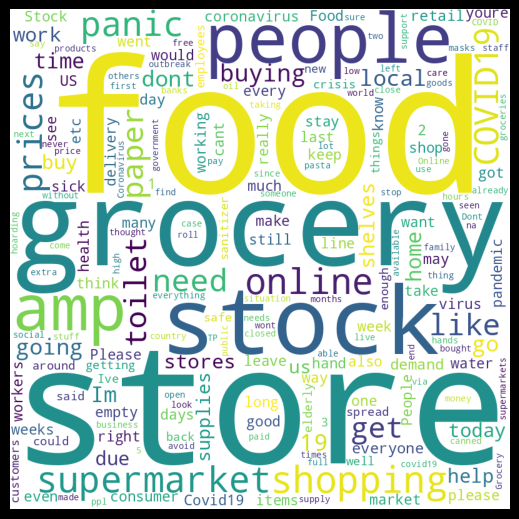

In [123]:
# Create word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=800,  background_color='white', min_font_size=10).generate_from_frequencies(word_freq)
# Plot the word cloud
plt.figure(figsize=(5,5), facecolor='black') 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

